## Text Classification


### The Data

The dataset below is from [kaggle]() and contains a dataset named "mtsamples.csv" containing medical transcriptions and their corresponding medical specialties.


In [3]:
!pip install --upgrade nltk
!pip install xgboost
!pip install wordcloud
!pip install transformers datasets torch scikit-learn
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import re
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('omw-1.4')




[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mrbed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mrbed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mrbed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mrbed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mrbed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

### Understand and Explore the Dataset
First, load and inspect the dataset:

In [28]:
import os

df = pd.read_csv('C:\\Users\\mrbed\\Capstone\\mtsamples.csv')

os.getcwd()

'C:\\Users\\mrbed\\Capstone'

In [6]:
print(df.columns)
df.head()

Index(['Unnamed: 0', 'description', 'medical_specialty', 'sample_name',
       'transcription', 'keywords'],
      dtype='object')


,Unnamed: 0,description,medical_specialty,sample_name,transcription,keywords
0,0,A 23-year-old white female presents with comp...,Allergy / Immunology,Allergic Rhinitis,"SUBJECTIVE:, This 23-year-old white female pr...","allergy / immunology, allergic rhinitis, aller..."
1,1,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 2,"PAST MEDICAL HISTORY:, He has difficulty climb...","bariatrics, laparoscopic gastric bypass, weigh..."
2,2,Consult for laparoscopic gastric bypass.,Bariatrics,Laparoscopic Gastric Bypass Consult - 1,"HISTORY OF PRESENT ILLNESS: , I have seen ABC ...","bariatrics, laparoscopic gastric bypass, heart..."
3,3,2-D M-Mode. Doppler.,Cardiovascular / Pulmonary,2-D Echocardiogram - 1,"2-D M-MODE: , ,1. Left atrial enlargement wit...","cardiovascular / pulmonary, 2-d m-mode, dopple..."
4,4,2-D Echocardiogram,Cardiovascular / Pulmonary,2-D Echocardiogram - 2,1. The left ventricular cavity size and wall ...,"cardiovascular / pulmonary, 2-d, doppler, echo..."


### Preprocessing the Data

Steps:

Handle missing values: Drop or fill NaNs.

Lowercase: Normalize text.

Remove punctuation and stopwords.

Tokenize: Break into words.

Optional: Stemming or Lemmatization.

In [8]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df.dropna(subset=['transcription', 'medical_specialty'], inplace=True)
df['clean_text'] = df['transcription'].apply(preprocess)

### Feature Extraction
You need to convert text into numerical format.

#### Options:
TF-IDF Vectorization (recommended baseline)

Count Vectorizer

Word Embeddings (e.g., Word2Vec, GloVe) for advanced models

In [10]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df['medical_specialty']

### Data Visualization
Visualize the distribution of specialties and word clouds.

C:\Users\mrbed\AppData\Local\Temp\ipykernel_51116\1761214198.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis')


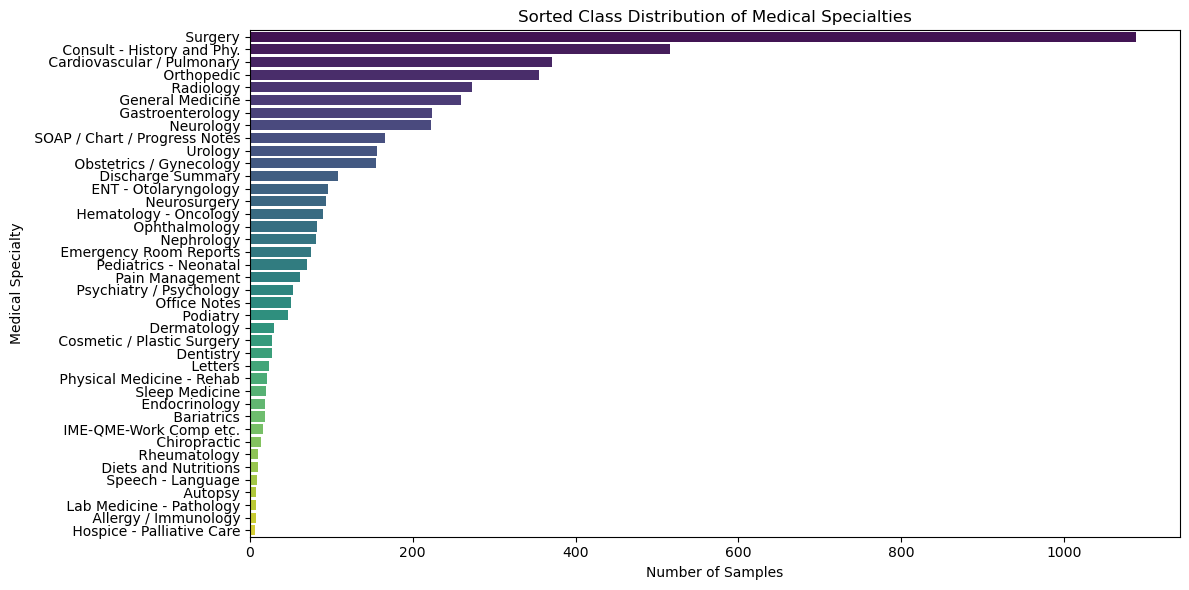

In [12]:
# Count and sort the classes
class_counts = df['medical_specialty'].value_counts().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=class_counts.values, y=class_counts.index, palette='viridis')
plt.title("Sorted Class Distribution of Medical Specialties")
plt.xlabel("Number of Samples")
plt.ylabel("Medical Specialty")
plt.tight_layout()
plt.show()

### Baseline Model
Use a simple Logistic Regression or Naive Bayes.

In [32]:
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         2
           1       1.00      0.00      0.00         1
           2       1.00      0.00      0.00         2
           3       0.45      0.32      0.37        79
           4       1.00      0.00      0.00         2
           5       0.29      0.95      0.44       111
           6       1.00      0.00      0.00         7
           7       1.00      0.00      0.00         8
           8       1.00      0.00      0.00         2
           9       1.00      0.00      0.00         1
          10       1.00      0.00      0.00        23
          11       1.00      0.00      0.00        32
          12       1.00      0.00      0.00        13
          13       1.00      0.00      0.00         2
          14       0.00      0.00      0.00        45
          15       0.00      0.00      0.00        44
          16       1.00      0.00      0.00        19
          17       1.00    

### Advanced Models to boost accuracy

Random Forest

XGBoost

Logistic Regression (baseline for comparison)

BERT with HuggingFace Transformers

We'll also compare results using accuracy, F1-score, precision, and recall.



#### PREP: Import + Vectorization (TF-IDF)

In [34]:
from sklearn.preprocessing import LabelEncoder
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])

# Encode labels
le = LabelEncoder()
y = le.fit_transform(df['medical_specialty'])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

### Model 1: Logistic Regression (Baseline)

In [36]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print("Logistic Regression Results:\n", classification_report(y_test, y_pred_lr, zero_division=1))

Logistic Regression Results:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00         1
           1       1.00      0.00      0.00         2
           2       1.00      0.00      0.00         4
           3       0.32      0.26      0.28        74
           4       1.00      0.00      0.00         3
           5       0.28      0.61      0.38       103
           6       1.00      0.00      0.00         5
           7       1.00      0.00      0.00         5
           8       1.00      0.00      0.00         6
           9       1.00      0.00      0.00         2
          10       0.36      0.18      0.24        22
          11       0.00      0.00      0.00        19
          12       1.00      0.00      0.00        15
          13       1.00      0.00      0.00         4
          14       0.23      0.16      0.19        45
          15       0.10      0.06      0.07        52
          16       1.00      0.00      0.00        

### Model 2: Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:\n", classification_report(y_test, y_pred_rf, zero_division=1))

Random Forest Results:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.14      0.15      0.15        79
           4       0.00      0.00      0.00         2
           5       0.10      0.12      0.11       111
           6       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         8
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.08      0.04      0.06        23
          11       0.00      0.00      0.00        32
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00        45
          15       0.02      0.02      0.02        44
          16       0.00      0.00      0.00        19
   

C:\Users\mrbed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mrbed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mrbed\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mrbed\anaconda3\Lib\site-packages\sklea

### Model 3: XGBoost

In [75]:

import xgboost as xgb

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=150)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
print("XGBoost Results:\n", classification_report(y_test, y_pred_xgb, zero_division=1))

C:\Users\mrbed\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:37:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Results:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         2
           3       0.15      0.15      0.15        79
           4       0.00      0.00      0.00         2
           5       0.10      0.09      0.09       111
           6       0.00      0.00      0.00         7
           7       0.14      0.12      0.13         8
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.21      0.17      0.19        23
          11       0.15      0.06      0.09        32
          12       0.00      0.00      0.00        13
          13       0.00      0.00      0.00         2
          14       0.03      0.02      0.03        45
          15       0.02      0.02      0.02        44
          16       0.00      0.00      0.00        19
         

### Model 4: BERT (Transformers)

In [96]:
df['label'] = le.fit_transform(df['medical_specialty'])
df['label']
df['clean_text']

0       subjective yearold white female present compla...
1       past medical history difficulty climbing stair...
2       history present illness seen abc today pleasan...
3       mmode left atrial enlargement left atrial diam...
4       left ventricular cavity size wall thickness ap...
                              ...                        
4994    history pleasure meeting evaluating patient re...
4995    admitting diagnosis kawasaki diseasedischarge ...
4996    subjective yearold white female come today com...
4997    chief complaint yearold male present childrens...
4998    history yearold male present today selfreferre...
Name: clean_text, Length: 4966, dtype: object

In [87]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
import torch

# Encode labels
df['label'] = le.fit_transform(df['medical_specialty'])

# Subset for faster training (optional)
df_small = df.sample(3000, random_state=42)  # reduce for demo
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

def tokenize(batch):
    return tokenizer(batch['clean_text'], padding=True, truncation=True, max_length=512)

dataset = Dataset.from_pandas(df_small[['clean_text', 'label']])
dataset = dataset.train_test_split(test_size=0.2)
dataset = dataset.map(tokenize, batched=True)
dataset.set_format('torch', columns=['input_ids', 'attention_mask', 'label'])

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=len(df['label'].unique()))

training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=2,
    weight_decay=0.01,
    logging_steps=10,
    save_total_limit=1,
    load_best_model_at_end=True,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['test']
)

trainer.train()

# Evaluate
preds = trainer.predict(dataset['test'])
y_pred_bert = preds.predictions.argmax(axis=1)
y_test_bert = dataset['test']['label']

print("BERT Results:\n", classification_report(y_test_bert, y_pred_bert, zero_division=1, target_names=le.classes_))


Map:   0%|          | 0/2400 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


TypeError: TrainingArguments.__init__() got an unexpected keyword argument 'evaluation_strategy'

### Compare Model Accuracy

In [91]:
from sklearn.metrics import accuracy_score
print("Model Comparison:")
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("BERT Accuracy:", accuracy_score(y_test_bert, y_pred_bert))

Model Comparison:
Logistic Regression Accuracy: 0.11066398390342053
Random Forest Accuracy: 0.08651911468812877
XGBoost Accuracy: 0.0925553319919517


NameError: name 'y_test_bert' is not defined

In [98]:
pip install transformers datasets scikit-learn torch --quiet

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

#### Task


**Text preprocessing:** As a pre-processing step, perform both `stemming` and `lemmatizing` to normalize your text before classifying. For each technique use both the `CountVectorize`r and `TfidifVectorizer` and use options for stop words and max features to prepare the text data for your estimator.


**Classification:** Once you have prepared the text data with stemming lemmatizing techniques, consider `LogisticRegression`, `DecisionTreeClassifier`, and `MultinomialNB` as classification algorithms for the data. Compare their performance in terms of accuracy and speed.

Share the results of your best classifier in the form of a table with the best version of each estimator, a dictionary of the best parameters and the best score.

In [57]:
# Define a function to preprocess the text

def preprocess_text_column(text_column):
    """
    Preprocess a pandas Series of text for classification.
    Includes lowercasing, removing punctuation, stemming, and lemmatization.
    """
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    
def preprocess_text_column(text_column):
    """
    Preprocess a pandas Series of text for classification.
    Handles non-string values, converts to lowercase, removes punctuation,
    applies stemming and lemmatization.
    """
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()

    def preprocess(text):
        # Convert to string and handle NaN
        text = str(text)

        # Lowercase
        text = text.lower()

        # Remove punctuation
        text = text.translate(str.maketrans('', '', string.punctuation))

        # Tokenize
        words = word_tokenize(text)

        # Apply stemming and then lemmatization
        processed_words = [lemmatizer.lemmatize(stemmer.stem(word)) for word in words]

        # Join words back into a single string
        return ' '.join(processed_words)

    return text_column.apply(preprocess)



In [58]:
df['transcription']

0       SUBJECTIVE:,  This 23-year-old white female pr...
1       PAST MEDICAL HISTORY:, He has difficulty climb...
2       HISTORY OF PRESENT ILLNESS: , I have seen ABC ...
3       2-D M-MODE: , ,1.  Left atrial enlargement wit...
4       1.  The left ventricular cavity size and wall ...
                              ...                        
4994    HISTORY:,  I had the pleasure of meeting and e...
4995    ADMITTING DIAGNOSIS: , Kawasaki disease.,DISCH...
4996    SUBJECTIVE: , This is a 42-year-old white fema...
4997    CHIEF COMPLAINT: , This 5-year-old male presen...
4998    HISTORY: , A 34-year-old male presents today s...
Name: transcription, Length: 4999, dtype: object

In [59]:
df['medical_specialty']

0              Allergy / Immunology
1                        Bariatrics
2                        Bariatrics
3        Cardiovascular / Pulmonary
4        Cardiovascular / Pulmonary
                   ...             
4994           Allergy / Immunology
4995           Allergy / Immunology
4996           Allergy / Immunology
4997           Allergy / Immunology
4998           Allergy / Immunology
Name: medical_specialty, Length: 4999, dtype: object

In [60]:
#processed = preprocess_text_column(df['text'])
df['medical_specialty'] = preprocess_text_column(df['medical_specialty'])
df['medical_specialty']

0              allergi immunolog
1                        bariatr
2                        bariatr
3       cardiovascular pulmonari
4       cardiovascular pulmonari
                  ...           
4994           allergi immunolog
4995           allergi immunolog
4996           allergi immunolog
4997           allergi immunolog
4998           allergi immunolog
Name: medical_specialty, Length: 4999, dtype: object

In [61]:
df['transcription'] = preprocess_text_column(df['transcription'])
df['transcription']

0       subject thi 23yearold white femal present with...
1       past medic histori he ha difficulti climb stai...
2       histori of present ill i have seen abc today h...
3       2d mmode 1 left atrial enlarg with left atrial...
4       1 the left ventricular caviti size and wall th...
                              ...                        
4994    histori i had the pleasur of meet and evalu th...
4995    admit diagnosi kawasaki diseasedischarg diagno...
4996    subject thi is a 42yearold white femal who com...
4997    chief complaint thi 5yearold male present to c...
4998    histori a 34yearold male present today selfref...
Name: transcription, Length: 4999, dtype: object

In [71]:
# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(df['transcription'], df['medical_specialty'], test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(df['transcription'], df['medical_specialty'], test_size=0.2, random_state=42)

In [73]:
# Define the pipelines
pipelines = [
    # CountVectorizer + Logistic Regression
    Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english', max_features=1500, max_df=0.75)),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    # TfidfVectorizer + Logistic Regression
    Pipeline([
        ('vectorizer', TfidfVectorizer(stop_words='english', max_features=1500, max_df=0.75)),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    # CountVectorizer + Decision Tree
    Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english', max_features=1500, max_df=0.75)),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    # TfidfVectorizer + Decision Tree
    Pipeline([
        ('vectorizer', TfidfVectorizer(stop_words='english', max_features=1500, max_df=0.75)),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    # CountVectorizer + Bayes
    Pipeline([
        ('vectorizer', CountVectorizer(stop_words='english', max_features=1500, max_df=0.75)),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', MultinomialNB())
    ]),
    # TfidfVectorizer + Bayes
    Pipeline([
        ('vectorizer', TfidfVectorizer(stop_words='english', max_features=1500, max_df=0.75)),
        ('scaler', StandardScaler(with_mean=False)),
        ('classifier', MultinomialNB())
    ]),
]

In [75]:
param_grids = [
    # CountVectorizer + Logistic Regression
    {'classifier__C': [0.3, 0.4, 0.5]},
    # TfidfVectorizer + Logistic Regression
    {'classifier__C': [0.15, 0.2, 0.25]},
    # CountVectorizer + Decision Tree
    {'classifier__max_depth': [200, 220, 250], 'classifier__min_samples_split': [50, 60, 70]},
    # TfidfVectorizer + Decision Tree
    {'classifier__max_depth': [150, 175, 200], 'classifier__min_samples_split': [70, 80, 90]},
    # CountVectorizer + Bayes
    {'classifier__alpha': [0.004, 0.005, 0.006]},
    # TfidfVectorizer + Bayes
    {'classifier__alpha': [0.004, 0.005, 0.006]}
]

### Results will be in the format below:

In [77]:
# Set up a dictionary to store the results
results = {
    'model': [
        'Logistic Regression (CountVectorizer)',
        'Logistic Regression (TfidfVectorizer)',
        'Decision Tree (CountVectorizer)',
        'Decision Tree (TfidfVectorizer)',
        'Naive Bayes (CountVectorizer)',
        'Naive Bayes (TfidfVectorizer)'
    ],
    'best_params': ['' for _ in range(6)],
    'best_score': ['' for _ in range(6)],
    'mean_fit_time': ['' for _ in range(6)]
}

In [80]:
pd.set_option('display.max_colwidth', None)  # Set to None for unlimited width

# Train and evaluate each pipeline with GridSearchCV
for i, (pipeline, param_grid) in enumerate(zip(pipelines, param_grids)):
    grid_search = GridSearchCV(pipeline, param_grid, cv=4, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    results['best_params'][i] = str(grid_search.best_params_)
    results['best_score'][i] = grid_search.best_score_
    results['mean_fit_time'][i] = grid_search.cv_results_['mean_fit_time'][grid_search.best_index_]
    print(f"{results['model'][i]}:")
    print(f"  Best params: {results['best_params'][i]}")
    print(f"  Best cross-validation score: {results['best_score'][i]:.4f}")
    print(f"  Mean fit time: {results['mean_fit_time'][i]:.2f}s")
    print()


# Create a Pandas DataFrame from the results
results_df = pd.DataFrame(results).set_index('model')

# Print the results
results_df

C:\Users\mrbed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mrbed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression (CountVectorizer):
  Best params: {'classifier__C': 0.5}
  Best cross-validation score: 0.1658
  Mean fit time: 7.33s



C:\Users\mrbed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\mrbed\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Logistic Regression (TfidfVectorizer):
  Best params: {'classifier__C': 0.25}
  Best cross-validation score: 0.1640
  Mean fit time: 6.75s

Decision Tree (CountVectorizer):
  Best params: {'classifier__max_depth': 200, 'classifier__min_samples_split': 70}
  Best cross-validation score: 0.2701
  Mean fit time: 2.64s

Decision Tree (TfidfVectorizer):
  Best params: {'classifier__max_depth': 150, 'classifier__min_samples_split': 90}
  Best cross-validation score: 0.2738
  Mean fit time: 3.37s

Naive Bayes (CountVectorizer):
  Best params: {'classifier__alpha': 0.006}
  Best cross-validation score: 0.3078
  Mean fit time: 1.91s

Naive Bayes (TfidfVectorizer):
  Best params: {'classifier__alpha': 0.006}
  Best cross-validation score: 0.3006
  Mean fit time: 1.92s



,best_params,best_score,mean_fit_time
model,,,
Logistic Regression (CountVectorizer),{'classifier__C': 0.5},0.165790,7.325892
Logistic Regression (TfidfVectorizer),{'classifier__C': 0.25},0.164041,6.752505
Decision Tree (CountVectorizer),"{'classifier__max_depth': 200, 'classifier__min_samples_split': 70}",0.270065,2.641254
Decision Tree (TfidfVectorizer),"{'classifier__max_depth': 150, 'classifier__min_samples_split': 90}",0.273821,3.368870
Naive Bayes (CountVectorizer),{'classifier__alpha': 0.006},0.307824,1.906741
Naive Bayes (TfidfVectorizer),{'classifier__alpha': 0.006},0.300570,1.919577
